In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("SeoulBikeData.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature                8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature(�C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall (cm)              8465 non-null   float64
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
 13  Functioning Day            8465 non-null   objec

In [3]:
train = df.copy()
train['Date'] = pd.to_datetime(train['Date'])
train.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature                         float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(�C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

In [4]:
train.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature                  0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
train['hour'] = train['Date'].dt.hour
train['minute'] = train['Date'].dt.minute
train['second'] = train['Date'].dt.second
train['dayofweek'] = train['Date'].dt.dayofweek
train.describe()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,day,hour,minute,second,dayofweek
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000,8465.000000,8465.0,8465.0,8465.0,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,2017.912109,6.493325,15.786651,0.0,0.0,0.0,3.020201
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,0.283154,3.463349,8.821231,0.0,0.0,0.0,1.987602
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,2017.000000,1.000000,1.000000,0.0,0.0,0.0,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,2018.000000,4.000000,8.000000,0.0,0.0,0.0,1.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,2018.000000,6.000000,16.000000,0.0,0.0,0.0,3.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,2018.000000,10.000000,23.000000,0.0,0.0,0.0,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,2018.000000,12.000000,31.000000,0.0,0.0,0.0,6.000000


In [6]:
train['Seasons'].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

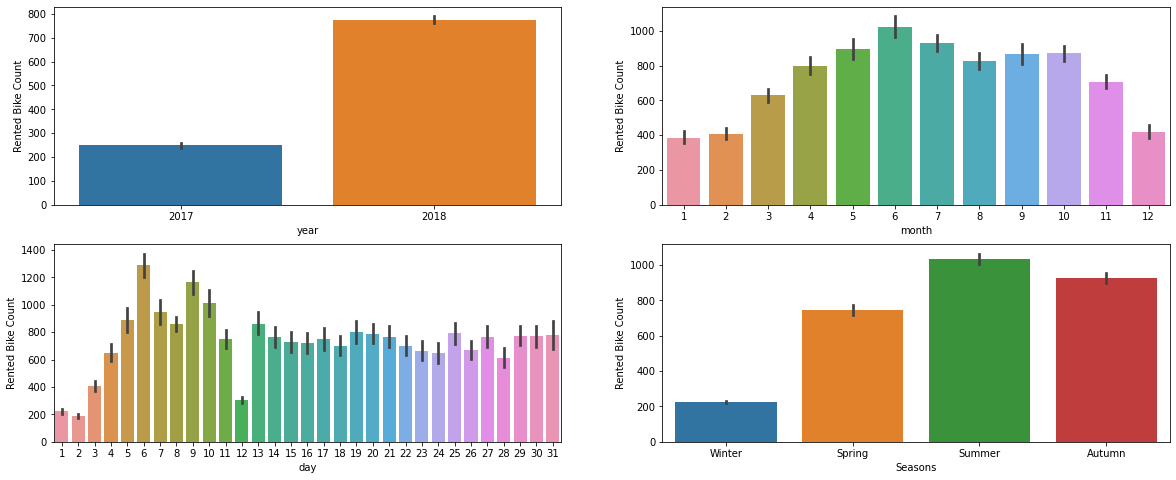

In [7]:
import matplotlib.pyplot as plt
fig,((ax1,ax2),(ax3,ax4)) =plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

import seaborn as sns 
sns.barplot(data=train, x="year", y="Rented Bike Count", ax=ax1)
sns.barplot(data=train, x="month", y="Rented Bike Count", ax=ax2)
sns.barplot(data=train, x="day", y="Rented Bike Count", ax=ax3)
sns.barplot(data=train, x="Seasons", y="Rented Bike Count", ax=ax4)